# Validation of the Model Sensitivity calculation


To validate the numerical implementation, we search for a a vector field that has a closed-form expression for the FTLE field, but already displays nontrivial spatial dependence. Following the '__Sine ridge__' example from [1],
we start with a simple system that has a closed form expression for the flowmap (and also the FTLE field).
$$\dot{x} = x - x^3 \\ \dot{y} = -y $$
This system can be integrated, and it can be seen that it has an FTLE ridge along the $y$ axis, which is the stable manifold for the fixed point. 

The integration and the transformations are done with SymPy.

Text(0, 0.5, 'Y')

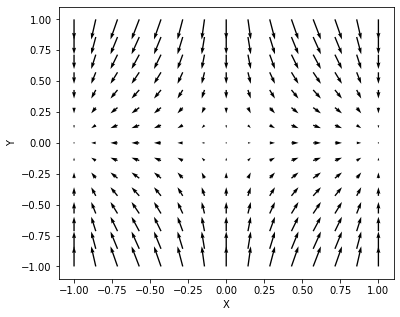

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
X, Y = np.meshgrid(np.linspace(-1, 1, 15), np.linspace(-1, 1, 15))
vx = X - X**3
vy = -Y
plt.figure(figsize=(6,5))
plt.quiver(X,Y, vx, vy)
plt.xlabel('X')
plt.ylabel('Y')




Now introduce a coordinate transform 

$$
(x,y) = w(u, v).
$$

The vector field in the new coordinates can be obtained by differentiating the expression:
$$
\dot{(w(u,v))} = f(w(u,v))
$$

$$
\nabla w \dot{(u,v)} = f(w(u,v)) \\
\dot{(u,v)} = (\nabla w)^{-1} f(w(u,v))
$$

If the flow map of the $(x,y)$ system is $F_{t_0}^t (x_0,y_0)$, the transformed system's becomes

$$
(F_{t_0}^t(u_0,v_0))' = w^{-1}\circ F_{t_0}^t \circ w(u_0,v_0)
$$

For the particular example, we have

$$F_{t_0}^t(x_0,y_0) = \left(\frac{x_0}{\sqrt{x_0^2 + (1-x_0^2)e^{-2(t-t_0)}}}, y_0e^{-(t-t_0)} \right).$$

Let's introduce the transformation 
$$
(x,y) := w(u,v) = (u - \sin v, v) \\
w^{-1}(x,y) = (x + \sin y, y).
$$

Under this, the flow map transforms into

$$
(F_{t_0}^t(u_0,v_0))' = \left( \frac{u_0 - \sin v_0}{\sqrt{(u_0 - \sin v_0)^2 + [1-(u_0 -\sin v_0)^2]e^{-2(t-t_0)}}} + \sin (v_0e^{-(t-t_0)}), v_0e^{-(t-t_0)} \right)
$$

From this, we can calculate the flow map gradient, and the Cauchy-Green strain tensor


$$\nabla (F_{t_0}^t(u_0,v_0))' = \begin{bmatrix}
    \frac{\partial (F_{t_0}^t(u_0,v_0))'_1}{\partial u_0} & \frac{\partial (F_{t_0}^t(u_0,v_0))'_1}{\partial v_0} \\
 \frac{\partial (F_{t_0}^t(u_0,v_0))'_2}{\partial u_0} & \frac{\partial (F_{t_0}^t(u_0,v_0))'_2}{\partial v_0}
\end{bmatrix}$$


$$
C_{t_0}^t(u_0,v_0) = [\nabla (F_{t_0}^t(u_0,v_0))']^T\nabla (F_{t_0}^t(u_0,v_0))'.
$$

Its maximal eigenvalue gives the FTLE field:
$$
\lambda_2 = \frac{\text{tr}(C) + \sqrt{(\text{tr}(C)^2 - 4\text{det}(C)}}{2} \\
\text{FTLE}(t,t_0, u_0,v_0) = \frac{\text{log} \lambda_2}{2 (t-t_0)}
$$

## Symbolic calculation with SymPy

In [2]:
from sympy import init_printing
init_printing()
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sympy import init_session
init_session()

IPython console for SymPy 1.5.1 (Python 3.7.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



In [4]:

## This is the flowmap for x' = x - x^3
x0, t1, t2 = symbols('x0 t1 t2')
def FlowMapx(x0, t2):
    denom = sqrt(x0**2 + (1 - x0**2)*exp(-2*t2))
    return x0/denom
FlowMapxx = FlowMapx(x0, t2)



In [6]:
u, v, t1, t2 = symbols('u v t1 t2')
def FlowMap1(u, v,t1, t2):
    denom = sqrt((u-sin(v))**2 + (1 - (u - sin(v))**2)*exp(-2*(t2-t1)))
    return (u-sin(v))/denom + sin(v*exp(-(t2-t1)))
FlowMapX = FlowMap1(u, v, t1, t2)

def FlowMap2(u,v,t1, t2):
    return v*exp(-(t2-t1))
FlowMapY = FlowMap2(u, v, t1, t2)

$$ 
F(u_0,v_0,t_1, t_2)_1 =
$$

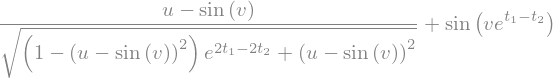

In [7]:
FlowMapX

Checking that the original flowmap satisfies the differential equation:

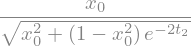

In [8]:
FlowMapxx

In [9]:
simplify(diff(FlowMapxx, t2) - (FlowMapxx -FlowMapxx**3))

$$ 
F(u_0,v_0,t_1, t2)_2 =
$$

In [10]:
FlowMapY

In [11]:
fxx = simplify(diff(FlowMapX, u))
fxy = simplify(diff(FlowMapX, v))
fyx = diff(FlowMapY, u)
fyy = diff(FlowMapY, v)

Flowmap Gradient is


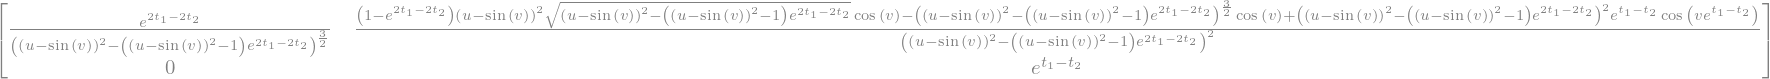

In [12]:
dF = Matrix([[fxx, fxy], [fyx, fyy]])
dF

Cauchy Green tensor

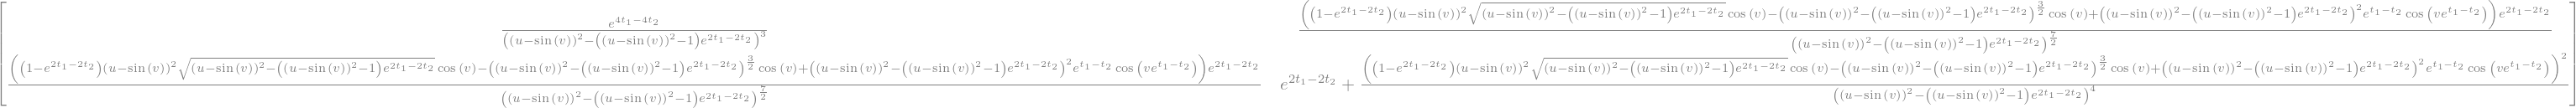

In [13]:
C = dF.T*dF
C

Eigenvalues, calculating it explicitly with the trace-determinant formula

In [14]:
tr = trace(C)
#tr = simplify(tr)
determ = det(C)
#determ = simplify(determ)

In [15]:
lambdaMax = (tr + sqrt(tr**2 - 4*determ))/2
lambdaMin = (tr - sqrt(tr**2 - 4*determ))/2

### Calculation of Model Sensitvity

Assume a ratio of $r$ between stochastic and deterministic modeling errors. $r=\Delta^\sigma_\infty/\Delta_\infty^2 = 1$
$$
\text{MS}_{t_0}^t (u_0,v_0;r) = \left(\int_{t_0}^t \sqrt{\lambda_2[u(s),v(s)]_s^t } ds\right)^2 + r\int_{t_0}^t \left( \lambda_2[u(s),v(s)]_s^t + \lambda_1[u(s),v(s)]_s^t \right) ds
$$

$$
u(s) = F_{t_0}^s(u_0,v_0)_1 \\
v(s) = F_{t_0}^s(u_0,v_0)_2 \\
$$

The "FTLE-pullback", depending on both $s$ and $t$ is
$$
f(s;t_0,t,u_0,v_0) := \sqrt{\lambda_2[u(s;t_0,u_0,v_0),v(s;t_0,u_0,v_0)]_s^t}
$$

Substituting the trajectory into the expression for $\lambda_2$:

In [16]:
u0 = Symbol('u0')
v0 = Symbol('v0')
s = Symbol('s')
t = Symbol('t')
t0 = Symbol('t0')
us = FlowMapX.subs([(u, u0), (v, v0), (t1, t0), (t2, s)])
vs = FlowMapY.subs([(u, u0), (v, v0), (t1, t0), (t2, s)])

In [17]:
lambdaAlongTraj = lambdaMax.subs([(u,us), (v,vs), (t1,s), (t2, t)])
lambdaMinAlongTraj = lambdaMin.subs([(u,us), (v,vs), (t1,s), (t2, t)])


In [18]:
lambdaAlongTrajNumeric = lambdify((s,t,t0,u0,v0), lambdaAlongTraj, 'numpy')
lambdaMinAlongTrajNumeric = lambdify((s,t,t0,u0,v0), lambdaMinAlongTraj, 'numpy')

In [19]:
nx, ny = (50, 50)
unum = np.linspace(-2, 2,nx)
vnum = np.linspace(0,4,ny)
U, V = np.meshgrid(unum,vnum)


In [20]:
%matplotlib inline

To visualize the FTLE field, we set $s = t_0$.

In [21]:
maxEigenvalue = lambdaAlongTrajNumeric(0,2,0,U.T,V.T).T
FTLE = np.log(maxEigenvalue)/(2*2)

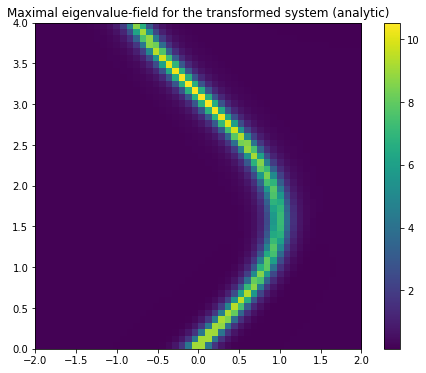

In [22]:
plt.figure(figsize=(8,6))
plt.imshow(np.sqrt(maxEigenvalue), origin='lower', extent=[-2, 2, 0, 4])
plt.title('Maximal eigenvalue-field for the transformed system (analytic)')
plt.colorbar()

## Comparing with MATLAB implementation

The FTLE field is calculated using both a finite difference approximation and the equation of variations.

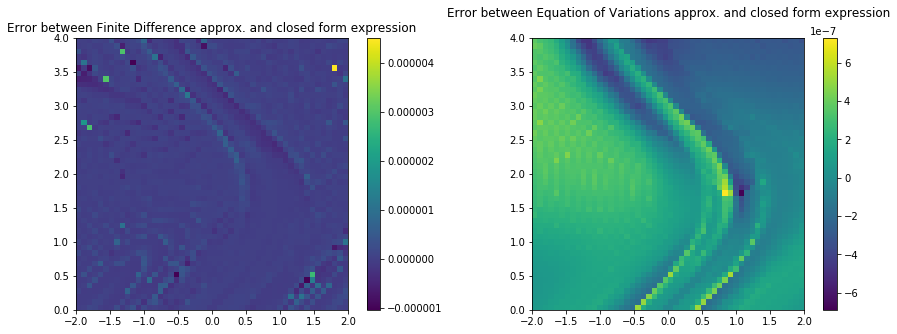

In [33]:
FTLEEov = np.loadtxt('FTLE_eov.dat')
FTLEFd = np.loadtxt('FTLE_finitediff.dat')
#plt.subplot(1,2,2)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Error between Finite Difference approx. and closed form expression')
plt.imshow((FTLE-FTLEFd),origin='lower', extent=[-2, 2, 0, 4])
plt.colorbar()
plt.subplot(1,2,2)
plt.title('Error between Equation of Variations approx. and closed form expression\n')
plt.imshow((FTLE-FTLEEov),origin='lower', extent=[-2, 2, 0, 4])
plt.colorbar()

### Model sensitivity fields

In [50]:
import scipy.integrate as integrate


In [60]:
MSAnalytic = np.zeros(U.shape)
TraceIntegral = np.zeros(U.shape)
for i in range(50):
    for j in range(50):
        
        MSAnalytic[i,j], err = integrate.quad(lambda s: np.sqrt(lambdaAlongTrajNumeric(s, 2 , 0, U[i,j] , V[i,j])), 0, 2)
        TraceIntegral[i,j],err  = integrate.quad(lambda s: lambdaAlongTrajNumeric(s, 2 , 0, U[i,j] , V[i,j]) + lambdaMinAlongTrajNumeric(s, 2 , 0, U[i,j] , V[i,j]),0,2)

MSFullAnalytic = MSAnalytic**2 + TraceIntegral

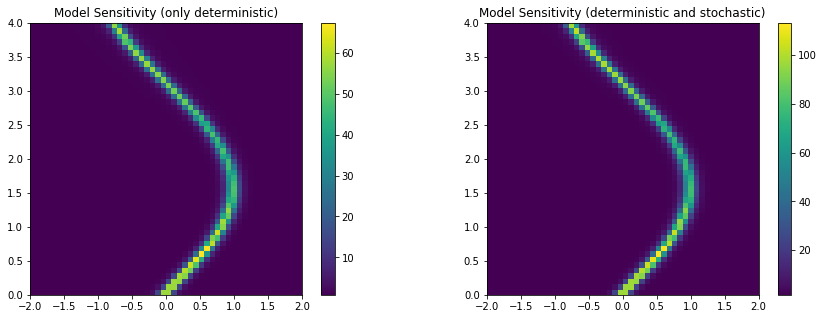

In [67]:
MSEov = np.loadtxt('MS_eov.dat')
MSFd = np.loadtxt('MS_finitediff.dat')

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Model Sensitivity (only deterministic)')
plt.imshow(MSAnalytic**2,origin='lower', extent=[-2, 2, 0, 4])
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Model Sensitivity (deterministic and stochastic)')
plt.imshow(MSFullAnalytic,origin='lower', extent=[-2, 2, 0, 4])
plt.colorbar()



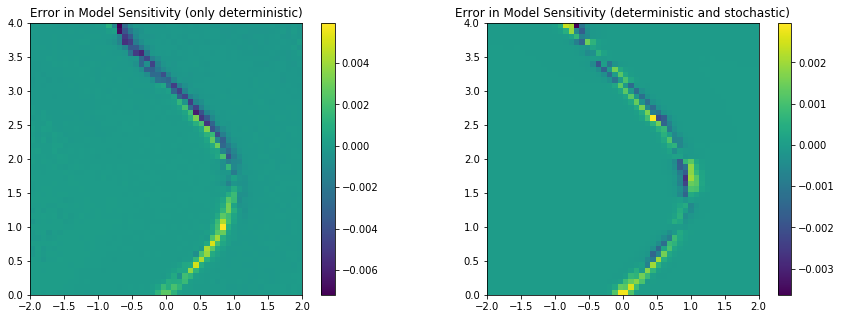

In [68]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Error in Model Sensitivity (only deterministic)')
plt.imshow(MSFullAnalytic-MSFd,origin='lower', extent=[-2, 2, 0, 4])
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Error in Model Sensitivity (deterministic and stochastic)')
plt.imshow(MSFullAnalytic-MSEov,origin='lower', extent=[-2, 2, 0, 4])
plt.colorbar()



### 3 : Time dependence of Model Sensitivity

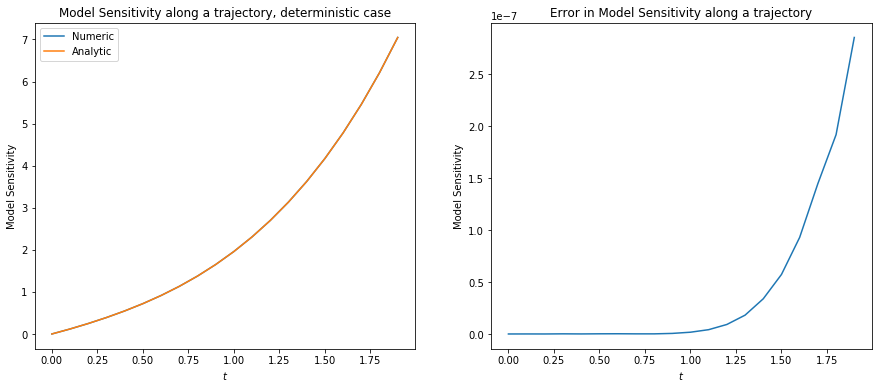

In [25]:
u00 = 1.
v00 = np.pi/2
integrateTimes =np.arange(0, 2.1, 2./20.)


ModelSensT = np.zeros(integrateTimes.shape)
def modelSens(t, t0, u00, v00, stepSize):
    integrateTimes = np.arange(t0, t, stepSize)
    values = np.zeros(integrateTimes.shape)
    valuesFull = np.zeros(integrateTimes.shape)
    for i in range(len(integrateTimes)):
        values[i] = np.sqrt(lambdaAlongTrajNumeric(integrateTimes[i], t , t0, u00 , v00))
        valuesFull[i] = lambdaAlongTrajNumeric(integrateTimes[i],t , t0, u00 , v00) + lambdaMinAlongTrajNumeric(integrateTimes[i], t , t0, u00 , v00)
    MSAnalytic = np.trapz(values, x = integrateTimes)
    TraceIntegral = np.trapz(valuesFull, x = integrateTimes)
    MSFullAnalytic = np.sqrt(MSAnalytic**2 + TraceIntegral)
    return MSAnalytic

for i in range(len(integrateTimes)):
    timet = round(integrateTimes[i], 3) ## t
    #print(timet)
    ModelSensT[i] = modelSens(timet, 0, u00, v00, 2./20.)
#plt.plot(integrateTimes, ModelSensT, '-')
timeNumeric = np.loadtxt('time.txt')
ModelSensNumeric = np.loadtxt('uncert_at_ridge.txt')
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(timeNumeric[:-1], ModelSensNumeric[:-1], '-',  label = 'Numeric')
plt.plot(timeNumeric[:-1], ModelSensT[1:], '-', label = 'Analytic')
plt.legend(loc='best')
plt.xlabel('$t$')
plt.ylabel('Model Sensitivity')
plt.title('Model Sensitivity along a trajectory, deterministic case')
plt.subplot(122)
plt.title('Error in Model Sensitivity along a trajectory')
plt.xlabel('$t$')
plt.ylabel('Model Sensitivity')
plt.plot(timeNumeric[:-1], np.abs(ModelSensT[1:]-ModelSensNumeric[:-1]), '-')





### References

[1] A. Kuhn, C. Rössl, T. Weinkauf and H. Theisel, "A benchmark for evaluating FTLE computations," 2012 IEEE Pacific Visualization Symposium, Songdo, 2012, pp. 121-128, doi: 10.1109/PacificVis.2012.6183582.